## Logistic Regression: Explanation

### What is Logistic Regression?
Logistic Regression is a statistical model used for binary classification. It predicts the probability that a given input belongs to a particular class. The key idea is to map the output of a linear model to the range $[0, 1]$ using the **sigmoid function**.

---

### Step 1: Linear Model
The first step is to compute a linear combination of the input features:
$
z = w^T x + b
$
where:
- $ z $: The logit (linear output),
- $ x $: Input feature vector,
- $ w $: Weight vector,
- $ b $: Bias (scalar).

---

### Step 2: Sigmoid Function
The output of the linear model $ z $ is passed through the **sigmoid activation function** to map it into the range $[0, 1]$:
$
\sigma(z) = \frac{1}{1 + e^{-z}}
$
This outputs the probability $ \hat{y} $ that the input $ x $ belongs to the positive class:
$
\hat{y} = P(y=1 | x) = \sigma(z)
$

---

### Step 3: Decision Rule
For binary classification, we use a threshold (commonly 0.5) to make predictions:
$
\hat{y} = 
\begin{cases} 
1 & \text{if } \sigma(z) \geq 0.5 \\ 
0 & \text{if } \sigma(z) < 0.5
\end{cases}
$

---

### Step 4: Loss Function
The model is trained by minimizing the **Binary Cross-Entropy Loss**:
$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$
where:
- $ y_i $: True label ($ 0 $ or $ 1 $),
- $ \hat{y}_i $: Predicted probability for sample $ i $,
- $ N $: Number of samples.

---

### Step 5: Optimization
The weights $ w $ and bias $ b $ are updated using **Gradient Descent**:
$
w \gets w - \eta \frac{\partial \mathcal{L}}{\partial w}, \quad
b \gets b - \eta \frac{\partial \mathcal{L}}{\partial b}
$
where $ \eta $ is the learning rate.

The gradients are computed as:
$
\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) x_i, \quad
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)
$


## Data Generation and Visualization
This block generates synthetic data using `make_blobs` with a specified number of classes and plots the data to visualize the distribution of points across different classes.

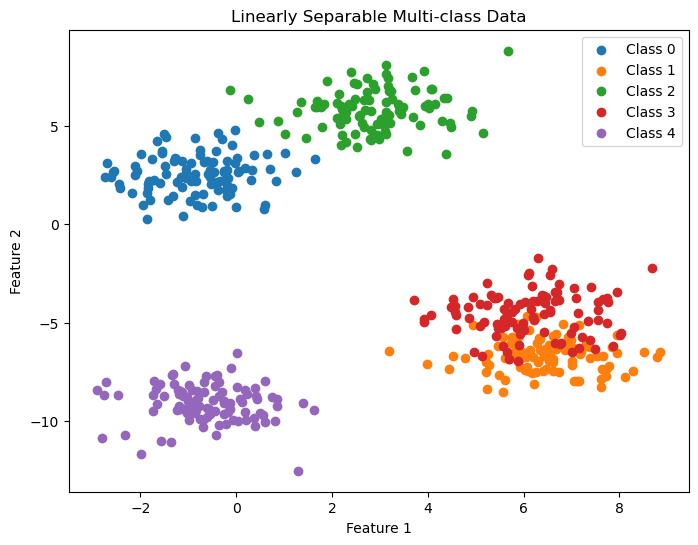

In [276]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate data with arbitrary number of classes
num_classes = 5
X, y = make_blobs(n_samples=500, centers=num_classes, n_features=2, cluster_std=1.0)

# Plot the data
plt.figure(figsize=(8, 6))
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f"Class {i}")
plt.title("Linearly Separable Multi-class Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Splitting the Data into Training and Testing Sets
The dataset is split into training and testing subsets using `train_test_split`. This ensures the model is evaluated on unseen data.

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Softmax Activation Function
The softmax function is implemented to convert raw scores (logits) into probabilities. It is used in the output layer of the model for multi-class classification.

In [278]:
# Softmax activation function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


## Cross-Entropy Loss Function
This block defines the cross-entropy loss function, which measures the difference between predicted probabilities and true labels. It is a common choice for classification tasks.

In [279]:
# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7  # Avoid log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))

## Initializing Weights and One-Hot Encoding Labels
The labels are one-hot encoded for compatibility with the softmax and cross-entropy functions. Weights and biases are initialized with small random values and zeros respectively.

In [280]:
# One-hot encode the labels for training
y_train_one_hot = np.eye(num_classes)[y_train]

# Initialize weights and bias
W = np.random.randn(2, num_classes) * 0.01  # Weights (features x classes)
b = np.zeros((1, num_classes))              # Bias (1 x classes)

## Training Phase of Logistic Regression

1. **Forward Pass**:
   - Compute the linear combination of inputs: $ z = w^T x + b $.
   - Apply the sigmoid activation to get probabilities: $ \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}} $.

2. **Compute Loss**:
   - Use Binary Cross-Entropy Loss:
     $
     \mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
     $

3. **Backward Pass**:
   - Calculate gradients of the loss with respect to weights and bias:
     $
     \frac{\partial \mathcal{L}}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) x_i, \quad
     \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)
     $

4. **Update Parameters**:
   - Use Gradient Descent to update weights and bias:
     $
     w \gets w - \eta \frac{\partial \mathcal{L}}{\partial w}, \quad
     b \gets b - \eta \frac{\partial \mathcal{L}}{\partial b}
     $

Repeat these steps for multiple epochs until the model converges (loss stabilizes or decreases significantly).


In [281]:
# Training loop
lr = 0.1  # Learning rate
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    Z = np.dot(X_train, W) + b  # Linear combination
    y_pred = softmax(Z)         # Apply softmax activation
    
    # Loss calculation
    loss = cross_entropy_loss(y_train_one_hot, y_pred)
    
    # Backward pass
    dZ = y_pred - y_train_one_hot  # Gradient of loss with respect to Z
    dW = np.dot(X_train.T, dZ) / len(X_train)  # Gradient of loss with respect to W
    db = np.sum(dZ, axis=0, keepdims=True) / len(X_train)  # Gradient of loss with respect to b
    
    # Parameter updates
    W -= lr * dW
    b -= lr * db
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")


Epoch 100/1000, Loss: 0.3157
Epoch 200/1000, Loss: 0.2769
Epoch 300/1000, Loss: 0.2598
Epoch 400/1000, Loss: 0.2492
Epoch 500/1000, Loss: 0.2413
Epoch 600/1000, Loss: 0.2349
Epoch 700/1000, Loss: 0.2295
Epoch 800/1000, Loss: 0.2247
Epoch 900/1000, Loss: 0.2204
Epoch 1000/1000, Loss: 0.2164


### Testing performance on test set

In [282]:
# Evaluate on the test set
Z_test = np.dot(X_test, W) + b
y_test_pred = np.argmax(softmax(Z_test), axis=1)  # Predicted classes
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 89.33%


## Ploting the decision boundary of the classfier

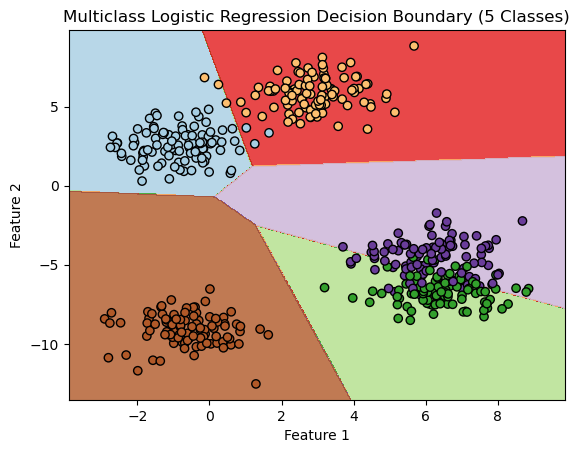

In [283]:
# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict probabilities for each point in the grid
Z = np.dot(grid, W) + b
pred_grid = np.argmax(softmax(Z), axis=1).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, pred_grid, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.title(f"Multiclass Logistic Regression Decision Boundary ({num_classes} Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Two-Layer Neural Network: Explanation

### What is a Two-Layer Neural Network?
A two-layer neural network consists of:
1. An **input layer** (features from the dataset).
2. A **hidden layer** (intermediate computations).
3. An **output layer** (final predictions).

The network learns to approximate a function that maps inputs to outputs by adjusting weights and biases through backpropagation.

---

### Step 1: Architecture

#### Input Layer:
- Accepts the input data $ X $ of size $ (m, n) $, where:
  - $ m $: Number of samples.
  - $ n $: Number of features.

#### Hidden Layer:
- Applies weights $ W_1 $ of size $ (n, h) $, where $ h $ is the number of neurons in the hidden layer.
- Computes the linear transformation:
  $
  Z_1 = XW_1 + b_1
  $
  where $ b_1 $ is the bias of size $ (1, h) $.
- Applies a non-linear activation function (e.g., ReLU):
  $
  A_1 = \text{ReLU}(Z_1)
  $

#### Output Layer:
- Applies weights $ W_2 $ of size $ (h, o) $, where $ o $ is the number of output neurons (e.g., 1 for binary classification).
- Computes the linear transformation:
  $
  Z_2 = A_1W_2 + b_2
  $
  where $ b_2 $ is the bias of size $ (1, o) $.
- Applies an activation function (e.g., Sigmoid for binary classification):
  $
  A_2 = \sigma(Z_2)
  $
  $ A_2 $ represents the predicted probabilities.

---

### Step 2: Forward Pass
1. Compute $ Z_1 = XW_1 + b_1 $ (hidden layer linear transformation).
2. Apply activation: $ A_1 = \text{ReLU}(Z_1) $.
3. Compute $ Z_2 = A_1W_2 + b_2 $ (output layer linear transformation).
4. Apply activation: $ A_2 = \sigma(Z_2) $ (final prediction).

---

### Step 3: Loss Function
For binary classification, the **Binary Cross-Entropy Loss** is used:
$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$

---

### Step 4: Backward Pass
To minimize the loss, compute gradients of weights and biases using the chain rule.

1. **Output Layer Gradients**:
   $
   dZ_2 = A_2 - y
   $
   $
   dW_2 = \frac{1}{m} A_1^T dZ_2, \quad db_2 = \frac{1}{m} \sum dZ_2
   $

2. **Hidden Layer Gradients**:
   - Backpropagate through $ W_2 $ and activation:
     $
     dA_1 = dZ_2 W_2^T, \quad dZ_1 = dA_1 \cdot \text{ReLU}'(Z_1)
     $
   $
   dW_1 = \frac{1}{m} X^T dZ_1, \quad db_1 = \frac{1}{m} \sum dZ_1
   $

---

### Step 5: Parameter Updates
Use **Gradient Descent** to update the weights and biases:
$
W_1 \gets W_1 - \eta dW_1, \quad b_1 \gets b_1 - \eta db_1
$
$
W_2 \gets W_2 - \eta dW_2, \quad b_2 \gets b_2 - \eta db_2
$
where $ \eta $ is the learning rate.

---

### Step 6: Training Process
1. Initialize weights $ W_1, W_2 $ and biases $ b_1, b_2 $ randomly.
2. Repeat for multiple epochs:
   - Perform forward pass to compute $ A_2 $.
   - Compute the loss.
   - Perform backward pass to compute gradients.
   - Update parameters using Gradient Descent.
3. Evaluate the model on a test set.


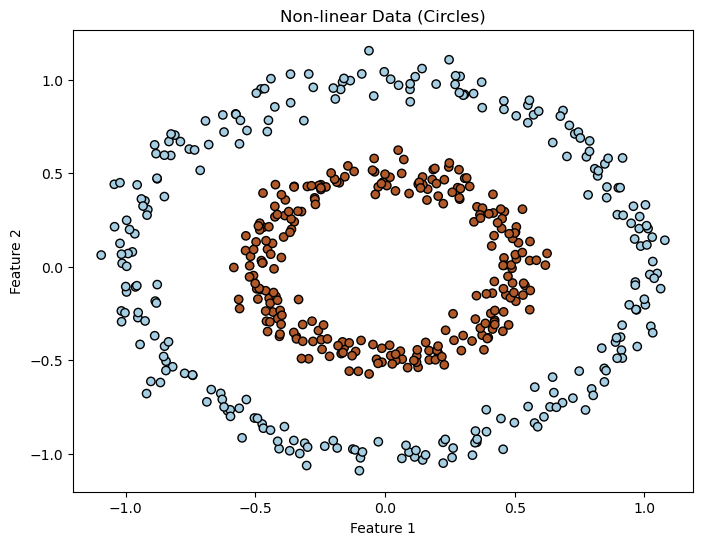

In [284]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# Generate nonlinear data (circles)
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Non-linear Data (Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Question: Minimum Number of Neurons in the Hidden Layer

### Task:
For the `make_circles` dataset, determine the **minimum number of neurons** required in the hidden layer of a two-layer neural network to classify the data correctly. 

### Question:
what is the minimum number of neurons required in the hidden layer for the correct classification of data points?
### Answer:

Using three neurons in the hidden layer is sufficient to classify the `make_circles` dataset. Here's why:
- **1 Neuron**: A single linear boundary cannot separate the two circles. The network behaves like a logistic regression model, which fails for non-linear problems.

- **2 Neurons**: Two linear boundaries can create at most two linear regions. This setup can divide the input space into two regions but is insufficient to handle the circular structure of the data.

- **3 Neurons**: Three neurons define three linear boundaries. With ReLU activations, these boundaries can be combined to form non-linear regions that closely approximate the circular boundary between the two classes.
- **4+ Neurons**: Increasing the number of neurons further improves the approximation but is not strictly necessary.


In [285]:
# Initialize parameters for a two-layer neural network
input_dim = 2        # Number of input features
hidden_dim = 3      # Number of neurons in the hidden layer
output_dim = 1       # Number of neurons in the output layer


### Parameter initialization

In [286]:
W1 = np.random.randn(input_dim, hidden_dim) * 0.01  # Weights for hidden layer
b1 = np.zeros((1, hidden_dim))                      # Biases for hidden layer
W2 = np.random.randn(hidden_dim, output_dim) * 0.01 # Weights for output layer
b2 = np.zeros((1, output_dim))                      # Biases for output layer

### Implementing activation functions

In [287]:
# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-7  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


### Forward Pass

In [288]:
# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    # Layer 1
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    # Layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

### Backward Pass

In [289]:
# Backward pass
def backward_pass(X, y, Z1, A1, Z2, A2, W2):
    m = X.shape[0]
    
    # Gradients for Layer 2 (Output Layer)
    dZ2 = A2 - y.reshape(-1, 1)  # Derivative of loss wrt Z2
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    # Gradients for Layer 1 (Hidden Layer)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

### Training Loop
Train the model with the minimum number of neurons in the hidden layer

In [290]:
# Training loop
epochs = 30000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
    
    # Compute loss
    loss = binary_cross_entropy(y_train, A2)
    
    # Backward pass
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, Z2, A2, W2)
    
    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")


Epoch 100/30000, Loss: 0.6931
Epoch 200/30000, Loss: 0.6931
Epoch 300/30000, Loss: 0.6931
Epoch 400/30000, Loss: 0.6931
Epoch 500/30000, Loss: 0.6932
Epoch 600/30000, Loss: 0.6932
Epoch 700/30000, Loss: 0.6933
Epoch 800/30000, Loss: 0.6940
Epoch 900/30000, Loss: 0.6959
Epoch 1000/30000, Loss: 0.6995
Epoch 1100/30000, Loss: 0.7043
Epoch 1200/30000, Loss: 0.7116
Epoch 1300/30000, Loss: 0.7209
Epoch 1400/30000, Loss: 0.7372
Epoch 1500/30000, Loss: 0.7612
Epoch 1600/30000, Loss: 0.7911
Epoch 1700/30000, Loss: 0.8240
Epoch 1800/30000, Loss: 0.8544
Epoch 1900/30000, Loss: 0.8833
Epoch 2000/30000, Loss: 0.9084
Epoch 2100/30000, Loss: 0.9360
Epoch 2200/30000, Loss: 0.9575
Epoch 2300/30000, Loss: 0.9821
Epoch 2400/30000, Loss: 1.0041
Epoch 2500/30000, Loss: 1.0224
Epoch 2600/30000, Loss: 1.0400
Epoch 2700/30000, Loss: 1.0494
Epoch 2800/30000, Loss: 1.0585
Epoch 2900/30000, Loss: 1.0681
Epoch 3000/30000, Loss: 1.0917
Epoch 3100/30000, Loss: 1.1144
Epoch 3200/30000, Loss: 1.1358
Epoch 3300/30000,

#### Calculate accuarcy the data on test dataset

In [291]:
# Prediction
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 >= 0.5).astype(int)

# Evaluate the model
y_pred = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred.flatten() == y_test) * 100
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 100.00%


### Plot the decision boundary

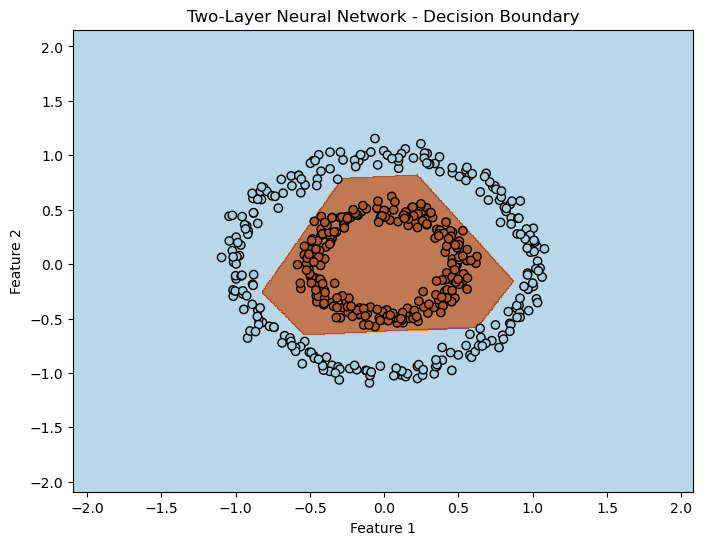

In [292]:
# Plot decision boundary
def plot_decision_boundary(X, y, W1, b1, W2, b2, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict for each point in the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict(grid, W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X, y, W1, b1, W2, b2, "Two-Layer Neural Network - Decision Boundary")
